This notebook looks at the processed data in terms of how many nulls there are.

In [4]:
import json
from matplotlib import pyplot as plt

In [3]:
tu = json.load(open('../../../data/processed/dim/depositonce.json'))
hu = json.load(open('../../../data/processed/dim/edoc.json'))
fu = json.load(open('../../../data/processed/dim/refubium.json'))

Ratio of theses to publications, per repository and overall.

Text(0.5, 1.0, 'All')

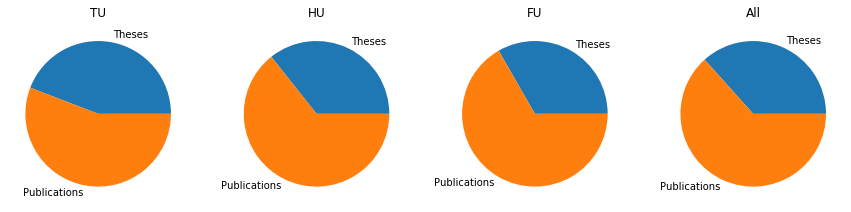

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
titles = ['TU', 'HU', 'FU']
total_theses, total_publications = 0, 0
for i, repo in enumerate([tu, hu, fu]):
    n_theses = sum([doc['type'][1] == 'thesis' for doc in repo])
    n_publications = sum([doc['type'][1] == 'publication' for doc in repo])
    assert n_theses + n_publications == len(repo)
    ax[i].pie([n_theses, n_publications], labels=['Theses', 'Publications'])
    ax[i].set_title(titles[i])
    total_theses += n_theses
    total_publications += n_publications
ax[3].pie([total_theses, total_publications], labels=['Theses', 'Publications'])
ax[3].set_title('All')